In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reshape trainX to (7579, 1500) by flattening the last two dimensions
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")

trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1))


In [29]:
# Create a Random Forest Regressor
rf_model = RandomForestClassifier(n_estimators=30, random_state=42)
# Train the model
rf_model.fit(trainX, trainY)
# Make predictions on the test set
y_pred = rf_model.predict(testX)

# Evaluate the model


C:\Users\hojoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [30]:
report = classification_report(testY, y_pred)
print(f"Classification Report: {report}")

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.94      0.93       964
           1       0.93      0.91      0.92       931

    accuracy                           0.93      1895
   macro avg       0.93      0.93      0.93      1895
weighted avg       0.93      0.93      0.93      1895



In [31]:
rf_model.feature_importances_

array([0.00072777, 0.00029384, 0.00014889, ..., 0.00065699, 0.00064077,
       0.00066896])

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_.reshape((25, 60))
feature_importances = feature_importances[20:25, :]
feature_importances = feature_importances.mean(axis=0)

In [45]:
feature_importances

array([5.50442888e-03, 6.31606111e-05, 6.82262156e-03, 1.01844487e-02,
       6.30163707e-03, 1.18790135e-03, 1.10595339e-03, 4.25500880e-05,
       1.49014738e-04, 2.40461621e-04, 2.63794213e-03, 2.31049261e-03,
       2.85817132e-04, 6.89060208e-04, 1.34817974e-04, 9.46232349e-05,
       1.88106191e-03, 3.02357351e-04, 1.06665641e-02, 3.38192549e-04,
       4.64020958e-03, 8.64170388e-05, 5.71313503e-03, 7.30077520e-03,
       8.89432145e-03, 9.73507825e-04, 9.88953551e-04, 1.12245894e-04,
       4.54601980e-04, 5.45030722e-04, 2.74234771e-03, 1.43743921e-03,
       3.44191003e-04, 4.91002160e-04, 3.08945902e-04, 2.02878954e-04,
       3.80295085e-03, 1.94943334e-04, 9.02227336e-03, 2.84651501e-03,
       2.36118369e-04, 1.58559902e-04, 1.86818663e-04, 1.33998950e-04,
       0.00000000e+00, 2.01161700e-04, 1.41780462e-04, 1.02326186e-04,
       3.05019409e-04, 0.00000000e+00, 8.30463906e-04, 9.67437869e-04,
       7.61764451e-04, 7.35827660e-04, 6.88308977e-04, 7.80204312e-04,
      

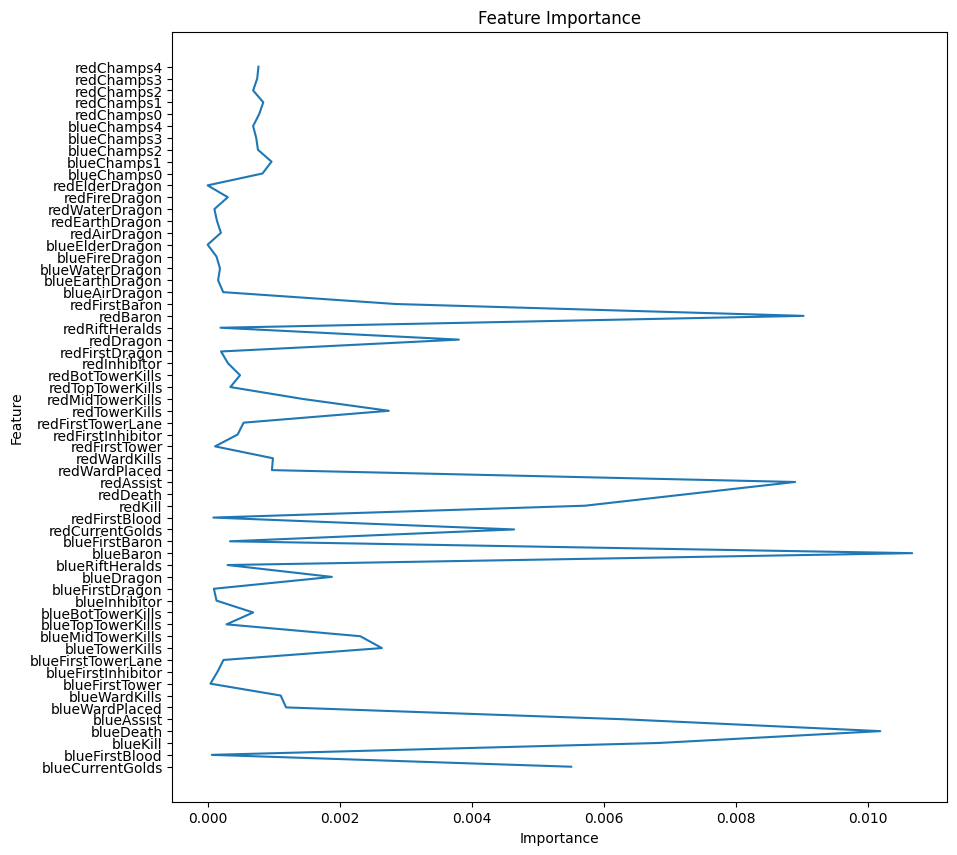

In [46]:
header = ['blueCurrentGolds', 'blueFirstBlood', 'blueKill', 'blueDeath', 'blueAssist', 'blueWardPlaced', 'blueWardKills', 'blueFirstTower', 'blueFirstInhibitor', 'blueFirstTowerLane', 'blueTowerKills', 'blueMidTowerKills', 'blueTopTowerKills', 'blueBotTowerKills', 'blueInhibitor', 'blueFirstDragon', 'blueDragon', 'blueRiftHeralds', 'blueBaron', 'blueFirstBaron', 'redCurrentGolds', 'redFirstBlood', 'redKill', 'redDeath', 'redAssist', 'redWardPlaced', 'redWardKills', 'redFirstTower', 'redFirstInhibitor', 'redFirstTowerLane', 'redTowerKills', 'redMidTowerKills', 'redTopTowerKills', 'redBotTowerKills', 'redInhibitor', 'redFirstDragon', 'redDragon', 'redRiftHeralds', 'redBaron', 'redFirstBaron', 'blueAirDragon', 'blueEarthDragon', 'blueWaterDragon', 'blueFireDragon', 'blueElderDragon', 'redAirDragon', 'redEarthDragon', 'redWaterDragon', 'redFireDragon', 'redElderDragon', 'blueChamps0', 'blueChamps1', 'blueChamps2', 'blueChamps3', 'blueChamps4', 'redChamps0', 'redChamps1', 'redChamps2', 'redChamps3', 'redChamps4']

plt.figure(figsize=(10, 10))
plt.plot(feature_importances, header)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [35]:
train_accuracy = rf_model.score(trainX, trainY)
print(f"Train Accuracy: {train_accuracy}")
# Calculate the accuracy of the model on the test set
test_accuracy = rf_model.score(testX, testY)
print(f"Test Accuracy: {test_accuracy}")

# Check if the model is overfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


Train Accuracy: 1.0
Test Accuracy: 0.9255936675461741
The model is overfitting.
